# Examining Racial Discrimination in the US Job Market

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?


#### Resources
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [21]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [173]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [175]:
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>


1. What test is appropriate for this problem? Does CLT apply?
2. What are the null and alternate hypotheses?
   
The Central limit theorem does appy. We have two samples of sample size of 2435 for white-sounding and black-sounding name groups. Since the sample size is large enoug (>30), the sample distribution of proportion will take a normal distribution. Samples can be consider independent because 2435 will be less than 10% of total population with the same properties. 

Getting a call or not can be modeled with a Bernoulli distribution. 
The samples we have have observed proportion p_w, p_b = 0.09650924024640657, 0.06447638603696099. 

Null hypothesis is the two groups have the same callback proportions. 
Alternative hypothesis is that two groups DO NOT have the same callback proportions. 


We will assume the null hypothesis and compute the probability that p_w-p_b is 0.032. 
We wil reject the null hypothesis if the probability is less than the significance level 5% (<-some chosen number) 

</div>

<div class="span5 alert alert-success">
<p>Your solution to Q3 here.</p>

Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

</div>

In [7]:
# Select rows with white and black-sounding names repectively
w = data[data.race=='w']
b = data[data.race=='b']

In [181]:
# Proportions of callbacks for each group
p_w = w.call.mean()
p_b = b.call.mean()
obs_diff = p_w-p_b
print(obs_diff)

0.03203285485506058


We are confident that there is a 95% chance that the true mean differnece is within 1.96SE of obs_diff
In other words, the true mean difference is in this 95% confidence interval (0.01677472 0.04729099)

In [195]:
SE = np.sqrt(w.call.var()/len(w) + b.call.var()/len(b))
interval=stats.norm.ppf([0.025, 0.975], obs_diff, SE)
print("Confidence interval:", interval)

Confidence interval: [0.01677472 0.04729099]


In [196]:
margin=(interval[1]-interval[0])/2
print("Margin of error:", margin*100, "%")

Margin of error: 1.5258137003691996 %


#### Bootstrapping: 


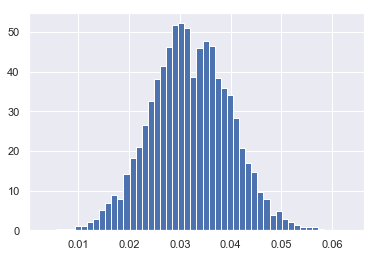

In [211]:

# Initialize empty array of size 10000
samplediff = np.empty(10000)

# For each i, randomly choose 130 'with replacement' and compute its mean. 
for i in range(10000):
    sample_w=np.mean(np.random.choice(w.call,2435))
    sample_b=np.mean(np.random.choice(b.call,2435))
    samplediff[i] = sample_w-sample_b
    
# Draw a histogram with the density parameter true. This makes the total area 1. 
histogram=plt.hist(samplediff, bins=50, density=True)
plt.show()

In [212]:
binwidth=histogram[1][1]-histogram[1][0]

In [213]:
sum(histogram[0]*binwidth)

1.0000000000000007

In [225]:
sum(histogram[0][:11]*binwidth)

0.024400000000000012

In [244]:
## Question? 
# How do I get the values where the area in the hisogram produces 2.5 and 97.5 percentiles? 

# find 2.5 percentile

perc = 0
index= 0
for i in range(50):
    perc = perc + histogram[0][i]*binwidth
    print(perc, i)
    if perc >=0.025:
        index=i-1
        break
        
# We add up to index 10 to get 2.5 percentile

int_left=histogram[1][index+1] #11th bin edge
print("left limit of the confience interval:", int_left)

0.0001 0
0.0001 1
0.0006000000000000004 2
0.001 3
0.0015 4
0.002800000000000002 5
0.004200000000000002 6
0.006800000000000002 7
0.010100000000000001 8
0.016200000000000003 9
0.024400000000000012 10
0.03520000000000001 11
left limit of the confience interval: 0.016476386934518812


In [245]:
perc = 0
index= 0
for i in range(50):
    perc = perc + histogram[0][i]*binwidth
    #print(perc, i)
    if perc >=0.975:
        index=i-1
        break
        
# We add up to index 10 to get 2.5 percentile

int_right=histogram[1][index+1] #11th bin edge
print("right limit of the confience interval:",int_right)

right limit of the confience interval: 0.04645585060119629


In [248]:
interval_boot= (int_left, int_right)
margin_boot = (int_right - int_left)/2*100
print("interval:", interval_boot)
print("margin of error: ", margin_boot, "%")

interval: (0.016476386934518812, 0.04645585060119629)
margin of error:  1.4989731833338737 %


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

Answer to Q4: we are confident that the true difference in means is greater than 0. This implies that there is some bias. 

Q5: how? 